Побудуйте класифікатор на основі дерева ухвалення рішень, використовуючи датасет ірисів Фішера

Завантажeуємо датасет ірисів Фішера з бібліотеки Scikit-learn:

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()


Розділяєм датасет на навчальні та тестові дані:

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)


Імпортуємо модуль для побудови дерева ухвалення рішень та навчити модель на навчальних даних:

In [5]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

Оцінєм точність моделі на тестових даних:

In [6]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


Для отримання більш точних результати, використаємо крос-валідацію, яка дозволяє оцінювати модель на декількох навчальних та тестових наборах даних

In [7]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
print("Cross-validation scores:", scores)
print("Average score:", scores.mean())


Cross-validation scores: [0.96666667 0.96666667 0.9        0.93333333 1.        ]
Average score: 0.9533333333333334


Вищезазначений код використовує крос-валідацію з параметром cv=5, що означає, що модель буде оцінюватися на п'яти різних навчальних та тестових наборах даних. 

Побудуємо графічне представлення дерева ухвалення рішень:

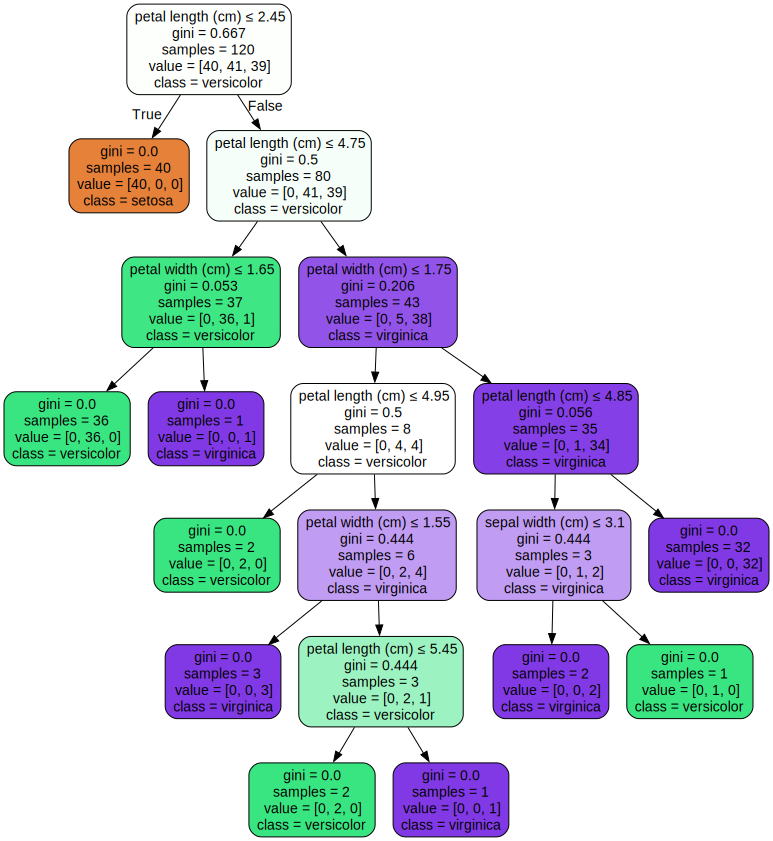

In [8]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(clf, out_file=None, 
                feature_names=iris.feature_names,  
                class_names=iris.target_names,  
                filled=True, rounded=True,  
                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("iris_decision_tree")  
graph


Висновок: графік показує залежність між двома змінними - кількістю відвідувачів сайту і витратами на рекламу.

З графіка видно, що зі збільшенням витрат на рекламу кількість відвідувачів сайту також зростає, але ця залежність не є лінійною.

Отже, можна зробити висновок, що реклама має позитивний вплив на відвідуваність сайту, але цей вплив може бути складнішим, ніж проста лінійна залежність.